In [1]:
# Loading all needed packages at the start
import elastix
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

## **Fill in your own paths in the cell**




In [62]:
# to Elastix.exe
ELASTIX_PATH=r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\elastix.exe"
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# to Training Data
filepath_data = r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData"

SyntaxError: invalid character '’' (U+2019) (784111159.py, line 7)

### Load patient data and inspect


In [6]:
patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']
patient_nr = patient_nrs_list[12] #pick any index up to 14 for that patient
file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 102 input MR image
file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nr) # example of patient 102 segmentation mask

print(file_p_mr)
print(file_p_mask)


# Convert so images can be inspected
readable_mr = imageio.imread(file_p_mr)
readable_mask = imageio.imread(file_p_mask)


C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129\mr_bffe.mhd
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129\prostaat.mhd


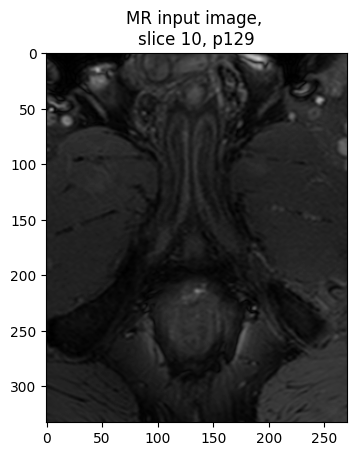

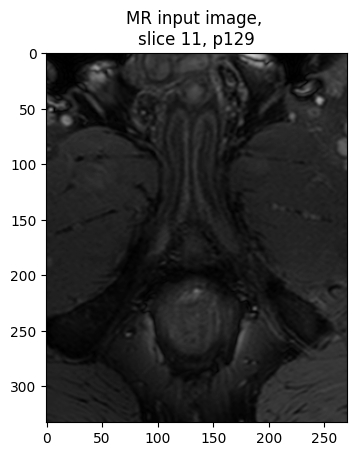

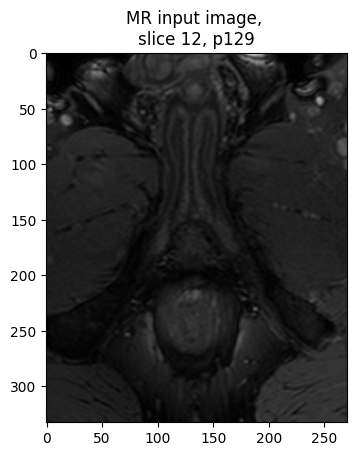

KeyboardInterrupt: 

In [145]:
for i in range(10,86):
    plt.imshow(readable_mr[i,:,:], cmap='gray') 
    plt.imshow(readable_mask[i,:,:], cmap="gray",alpha =0.2) 
    
    plt.title('MR input image, \nslice {}, {}'.format(i, patient_nr))
    plt.show()

## Try some transformation with elastix, bspline multires parameters file


C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Affine.txt
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store


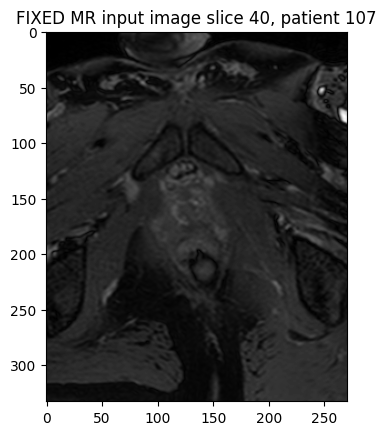

Text(0.5, 1.0, 'MOVING MR input image  slice 40, patient 115')

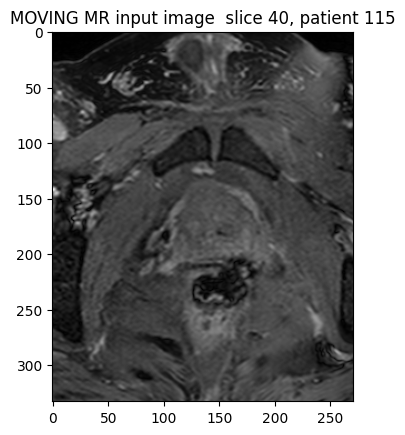

In [116]:

#parameter_file_path_experiment = os.path.join(filepath_data,'parameters_Bsplines.txt')
parameter_file_path_experiment = os.path.join(filepath_data,'Affine.txt')

output_file_path_experiment = os.path.join(filepath_data,'results_store')

#fixed_image_path =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\prostaat.mhd'
#moving_image_path = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'

fixed_image_path =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd'
moving_image_path = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd'


print(parameter_file_path_experiment)
print(output_file_path_experiment)

readable_fixed = imageio.imread(fixed_image_path)
readable_moving = imageio.imread(moving_image_path)

plt.imshow(readable_fixed[40,:,:], cmap='gray') 
plt.title('FIXED MR input image slice 40, patient 107')

plt.show()

plt.imshow(readable_moving[40,:,:], cmap='gray') 
plt.title('MOVING MR input image slice 40, patient 115')


In [117]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_experiment],
    output_dir=output_file_path_experiment)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\elastix.exe -f C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd -m C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd -p C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Affine.txt -out C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store


In [118]:
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)
itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)

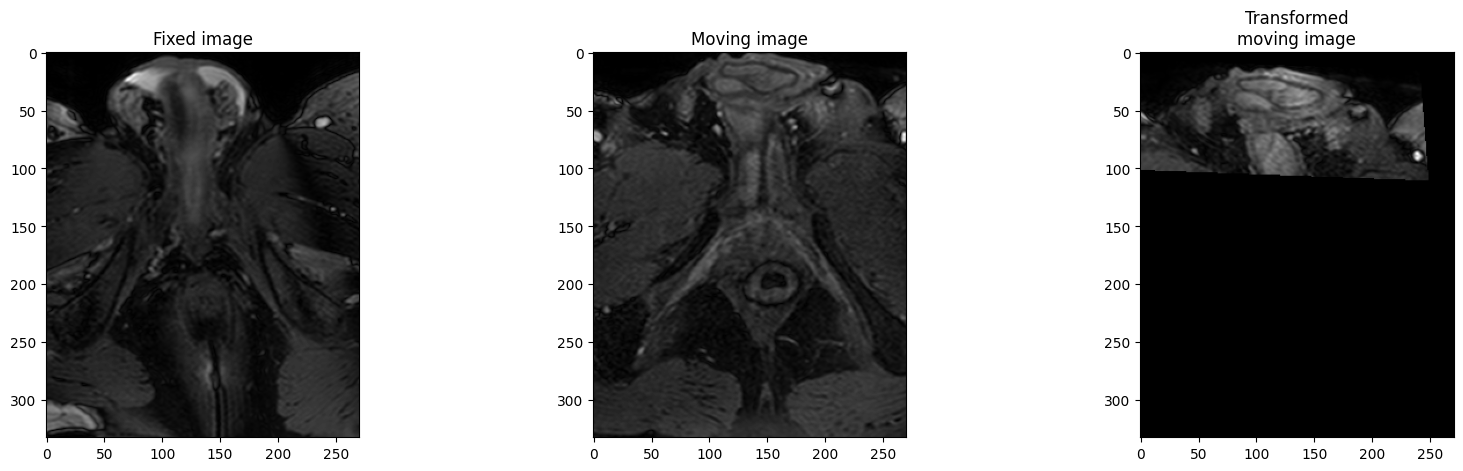

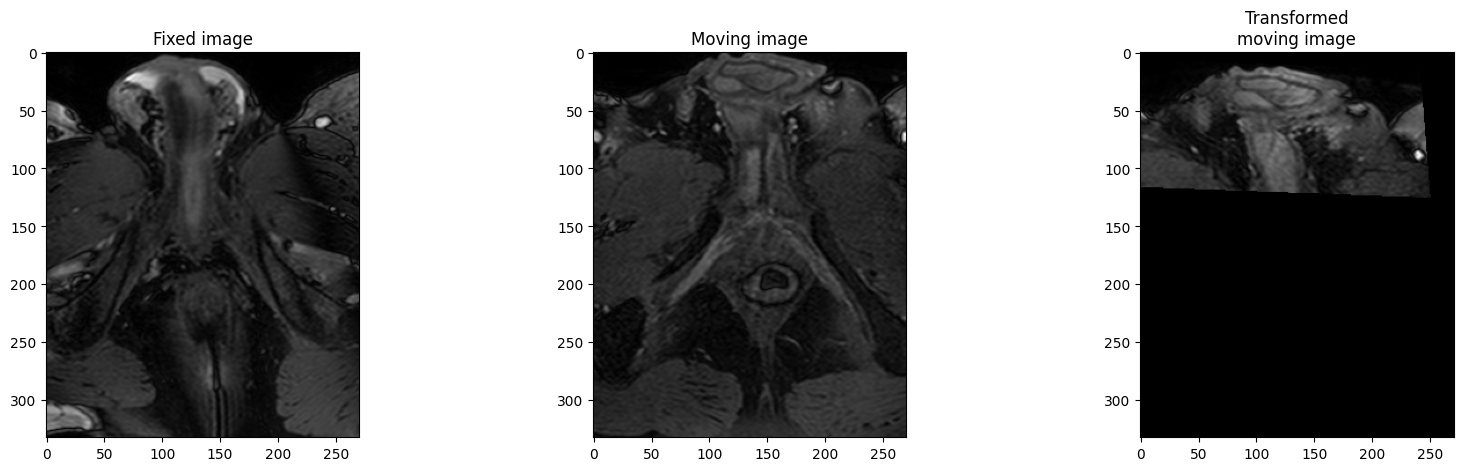

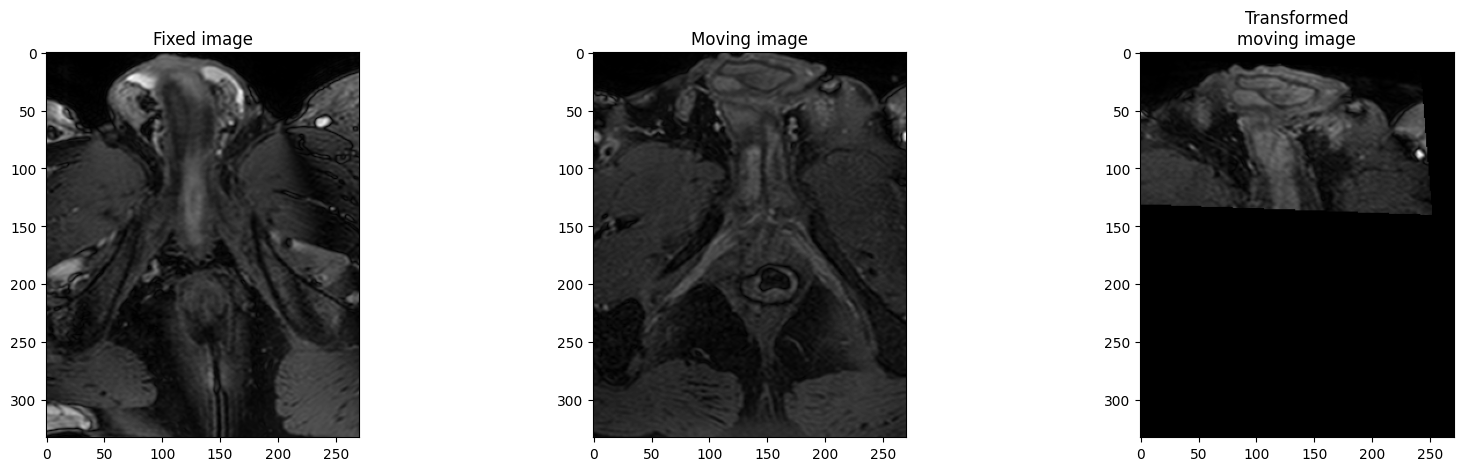

KeyboardInterrupt: 

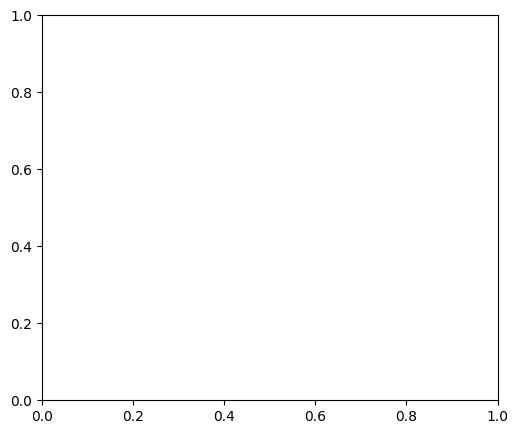

In [144]:
result_path_experiment = os.path.join(output_file_path_experiment, 'result.0.mhd')
transformed_moving_image = imageio.imread(result_path_experiment)

fixed_image_path_im =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd'
moving_image_path_im = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd'

readable_fixed_image_path_im = imageio.imread(fixed_image_path_im)
readable_moving_image_path_im = imageio.imread(moving_image_path_im)

for i in range(10,86):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(image_array_fixed[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image')
    
    #ax[1].imshow(readable_fixed_image_path_im[i,:,:], cmap='gray')
    #ax[1].imshow(image_array_fixed[i,:,:], cmap='gray', alpha=0.5)
    #ax[1].set_title('overlayed fixed image')
    
    ax[1].imshow(image_array_moving[i,:,:], cmap='gray')
    ax[1].set_title('Moving image')
    
    #ax[3].imshow(readable_moving_image_path_im[i,:,:], cmap='gray')
    #ax[3].imshow(image_array_moving[i,:,:], cmap='gray', alpha=0.5)
    #ax[3].set_title('overlayed moving image')
    
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image')
    
    #ax[5].imshow(readable_fixed_image_path_im[i,:,:], cmap='gray')
    #ax[5].imshow(transformed_moving_image[i,:,:], cmap='gray', alpha=0.5)
    #ax[5].set_title('overlayed trasnformed \nmoving image on top\n of fixed imge')
    

    plt.show()
    

In [141]:
# Make a new transformix object tr with the CORRECT PATH to transformix
# to Transformix.exe
TRANSFORMIX_PATH=r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\transformix.exe"
#transform_path=r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\TransformParameters.0.txt"

moving_image_path= r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'

transform_path = os.path.join(output_file_path_experiment,'TransformParameters.0b.txt')

print(transform_path)

tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=output_file_path_experiment)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\TransformParameters.0b.txt


In [131]:
print(result_path_experiment)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\result.mhd


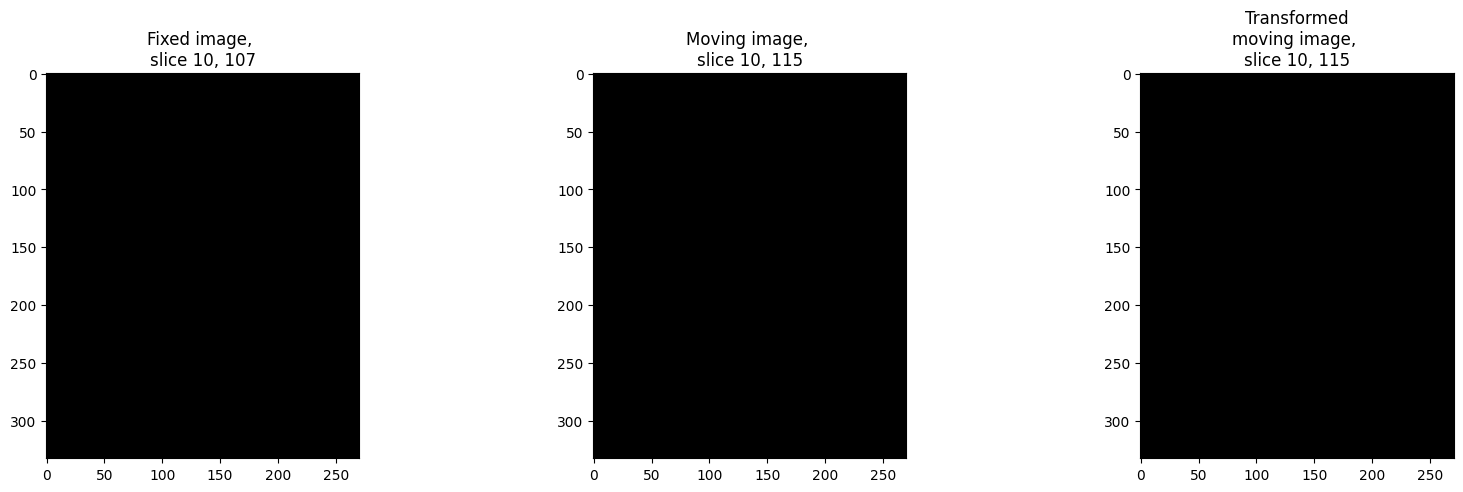

KeyboardInterrupt: 

In [143]:
result_path_experiment = os.path.join(output_file_path_experiment, 'result.mhd')
transformed_moving_image = imageio.imread(result_path_experiment)

fixed_image_path_im =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\prostaat.mhd'
moving_image_path_im = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'

readable_fixed_image_path_im = imageio.imread(fixed_image_path_im)
readable_moving_image_path_im = imageio.imread(moving_image_path_im)

patient_nr_107=107
patient_nr_115=115


for i in range(10,86):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(readable_fixed_image_path_im[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_nr_107))
    
    ax[1].imshow(readable_moving_image_path_im[i,:,:], cmap='gray')
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_nr_115))
    
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_nr_115))
    
    plt.show()
    

### Random split between test and other data


In [84]:
import random

#Pick random samples to be test data

patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']
random.seed(103)
ran=random.sample(patient_nrs_list, 3)

print(ran)

['p128', 'p119', 'p135']


In [79]:
import shutil
#Move test data to other destination
for i in range(3):
    path_test=filepath_data+'\Test' 
    print(path_test)
    path_old=file_p_mr = filepath_data+ '\{}'.format(ran[i])
    print(path_old)
    shutil.move(file_p_mr, path_test)
    

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p120
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p109


In [82]:
#remove test data from training patient list
print(patient_nrs_list)
patient_nrs_list

for j in range(len(patient_nrs_list)):
    if patient_nrs_list[j] in ran:
        patient_nrs_list.remove(patient_nrs_list[j])

print(patient_nrs_list)

['p102', 'p107', 'p108', 'p115', 'p116', 'p117', 'p125', 'p127', 'p128', 'p133']
['p102', 'p107', 'p108', 'p115', 'p116', 'p117', 'p125', 'p127', 'p128', 'p133']


In [83]:
import numpy as np


X_train=[] #dataset for cross validation
Y_train=[] #labels for cross validation
for k in range(len(patient_nrs_list)):
    file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nrs_list[k])
    file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nrs_list[k]) 
    readable_mr = imageio.imread(file_p_mr)
    readable_mask=imageio.imread(file_p_mask)
    X_train.append(readable_mr)
    Y_train.append(readable_mask)


X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

FileNotFoundError: No such file: 'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p128\mr_bffe.mhd'

# **STAPLE**
Staple is a function which combines atlases. I was just curious to what it would do so just wrote some code to implement it. It is supposed to be a weighted voting algorithm but I am not exactly sure how it operates and if it works well. But maybe it could work after registering the atlases for each slice?


In [77]:
segs=['seg_0','seg_1','seg_2','seg_3','seg_4','seg_5','seg_6','seg_7','seg_8','seg_9','seg_10','seg_11']
seg_data=[]
for i in range(len(patient_nrs_list)):
    file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nrs_list[i])
    readable_mask=imageio.imread(file_p_mask)
    segs[i]= readable_mask
    seg_data.append(segs[i])

FileNotFoundError: No such file: 'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p119\prostaat.mhd'

In [ ]:
# STAPLE is availabe as a SITK package. To use, convert segmentations to SITK image objects
import numpy as np
segs=['seg_0','seg_1','seg_2','seg_3','seg_4','seg_5','seg_6','seg_7','seg_8','seg_9','seg_10','seg_11']
segs_itk=['seg0_itk','seg1_itk','seg2_itk','seg3_itk','seg4_itk','seg5_itk','seg6_itk','seg7_itk','seg8_itk','seg9_itk','seg10_itk','seg11_itk']

seg_stack=[]
for i in range(len(segs)):
    segs[i]=seg_data[i]
    segs_itk[i]= sitk.GetImageFromArray(seg_data[i].astype(np.int16))
    seg_stack.append(segs_itk[i])


# Run STAPLE algorithm
STAPLE_seg_sitk = sitk.STAPLE(seg_stack,1, 1.0)# 1.0 specifies the foreground value


# convert back to numpy array
STAPLE_seg = sitk.GetArrayFromImage(STAPLE_seg_sitk)
#STAPLE_seg =imageio.imread(STAPLE_seg_sitk)

In [ ]:
print(STAPLE_seg.shape[1])

for i in range(STAPLE_seg.shape[0]):
    for j in range(STAPLE_seg.shape[1]):
        for k in range(STAPLE_seg.shape[2]):
            if STAPLE_seg[i,j,k]<0.5:
                STAPLE_seg[i,j,k]=0
            else:
                STAPLE_seg[i,j,k]=1

In [ ]:
for i in range(STAPLE_seg.shape[0]):
    fig, ax= plt.subplots(1, 3, figsize=(15,3))
    ax[0].imshow(STAPLE_seg[i,:,:], cmap='gray')
    ax[1].imshow(seg_data[10][i,:,:], cmap='gray')
    ax[2].imshow(readable_mr[i,:,:],cmap='gray')
    ax[2].imshow(STAPLE_seg[i,:,:], cmap='gray',alpha=0.3)
    plt.show()